# Introduction

In what follows I discuss my understanding of the theory of the Boltzmann equation. I must note that I have not previously been exposed to its intricacies or stat mech in general. After describing some theory, I then move into running d1q3.


---

# Theory

It is said that the Boltzmann equation is an evolution equation of the probability density of a given particle represented by f(x,v,t). As stated in lecture, if $ \Delta N = f \Delta x \Delta v $ then this indicates that f in a small phase space volume is the average number of particles contained in the volume at a given time.

The equation that models the evolution of this probability density 'f' is (simply by taking the time derivative and applying the chain rule):

$$ \frac{df}{dt} = \frac{\partial{f}}{\partial{t}} + \frac{p}{m} \frac{\partial{f}}{\partial{r}} + F.\frac{\partial{f}}{\partial{p}} = Q[f,f] = Q^{+} - Q^- $$

This is essentially a continuity equation in 6 dimensions (rather daunting).

The left hand side simply models the 'streaming' or movement in phase space while the right hand side models collisions with particles coming into a volume and particles going out ($Q^-$).

Note:
Liouville theorem states that $ df/dt = 0 $ wich means Q = 0. This further implies that in phase space there is volume conservation as long as $\textbf{there aren't any collisions}$ since collisions will not ensure that Q = 0. 

Since:

$$ |\delta r(t) \delta p(t)| = | \delta r(t+\Delta t) \delta p(t+\Delta t) | $$

is conserved, so to is the distribution. We can think of this as being the uncertainty principle in many ways and we are suggesting that our uncertainty in time doesn't change.


However, we live in a world where collisions do indeed take place. Collisions in this equation are modeled by complicated integrals with gain and loss terms here. The main thing to note is that conservation laws have to apply in that mass, momentum and energy must be conserved before and after collisions. 

One interesting problem worth studying is a state of local equilibria when gains = losses. In general, the Knudsen number can be used as a proxy for 'equilibria'. $ K_n = \lambda/L $. If this number is large, the mean free path ($\lambda$) is on an order comparable to the macro length being studied. In that situation, the collisions have to be accounted for and we will not be in equilibria. Therefore, to satisfy the equilibrium condition $ K_n << 1$. This will ensure, to a great extent, that the macrofield is unable to distinguish the micro collisions since they average out but there is some degree of weak non-equilibria.



***

We can use the model above with a small knudsen number to move from the boltzmann equation to the navier stokes equation.

If we look at the following moments we get:

Mass density

$$ \rho(r,t) = \int f(r,p,t)dp $$

Momentum density
$$ J_a(r,t) = \int f(r,p,t)p_adp $$

Momentum flux tensor
$$ P_{ab} = \int f(r,p,t)p_ap_bdp $$ 

Energy flux tensor
$$ Q_{abc} = \int f(r,p,t)p_ap_bp_cdp $$ 

We can see that we keep obtaining higher order tensors - endless moments to be generated.

As we discussed, near equilibrium $ Q~0$ so we can model Q by:

$$ Q = \frac{1}{\tau} (f^{eq}-f) $$

We can then integrate the Boltzmann equation over the tensors of p.

$$ \int B dp = \partial_t{\rho} + \partial_a{J_a} = 0$$

$$ \int B p_a dp = \partial_t{J_a} + \partial_b{P_{ab}} = 0$$


$$ \int B p_a p_b dp = \partial_t{P_{ab}} + \partial_c{Q_{abc}} = \frac{1}{\tau} (P^{eq} - P) $$


We make the adiabatic/weak closure and say that within a timescale tau the momentum flux tensor relaxes to equilibrium. The time derivative drops out of the above equation. 

Then we simply have to solve for advection and dissipation to get:

$$ \tau \partial_c{Q_{abc}} = 2\mu(\partial_a{u_b} + \partial_b{u_a}) + \lambda(\partial_c{u_c})\delta_{ab} $$

Which is of the form of Navier Stokes. Therefore, using Boltzmann, we can generate navier stokes by making the assumption that we are in a weak equilibrium regime thus forcing $ Q = 1/\tau (Q^{eq}-Q) $ and thus forcing the first time derivative of the momentum flux tensor to be zero.


# Numerics

Since we are dealing with 6 dimensions this is really challenging numerically. A good way to circumvent this is to fix the directions of the velocity vectors in which we look at the function. In 1d3 we have 2 velocity directions left and right. In general:

$$ f(x,p,t) = \sum_{i=0}^b f_i(x,t)\delta(p-c_i) $$



Plugging this into our boltzmann equation in 1D gives us:

$$ f_i(x+c_i \Delta t;t+\Delta t)-f_i(x,t) = -\omega[f_i -f_i^{eq}](x,t) $$


If we taylor expand to 1'st order in t we get on the LHS:

$$ f_i(x,t) + (c_i \Delta t \partial_x + \partial_t)f_i(x,y) -f_i(x,t) $$

Therefore:

$$ (c_i  \partial_x + \partial_t)f_i(x,y) = -\omega[f_i-f_i^{eq}](x,t) $$


If I sum over all discrete velocities I get:

$$ \partial_t \sum f_i(x,y) + \partial_x  \sum c_i f_i(x,y) $$

$$ \partial_t \rho + \partial_x J = 0 $$

We can also integrate the first moment and second moment and make the BGR approximation to get:


$$ \partial_t J + \partial_x P = 0 $$

$$ \partial_t J + \partial_x P^{eq} = \tau \partial_x^2 Q^{eq} $$


At equilibrium we also need to ensure mass-momentum conservation therefore:

$$ f_{-} + f_0 + f_{+} = \rho $$

$$ c(-f_{-} + f_{+}) = \rho u $$

$$ c^2(f_{-} + f_{+}) = p + \rho u^2 $$


\begin{pmatrix}
f_{-} \\
f_{+} \\
f_0
\end{pmatrix}
=
\begin{pmatrix}
(p-Jc + Ju)/2c^2 \\
(p+Ju + Jc)/2c^2 \\
(\rho c^2 -pc -Ju^2)/c^2
\end{pmatrix}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [53]:

def lb(omega):
    # variable definition
    visco = 0.1
    ar = 0
    br =0
    sigma = 5.
    rho0 = 1.00
    nout = 100
    mvar = []
    rhoinl = 1.01
    rhoout =0.99
    u0 = 0.1
    efield = 0.0
    nsteps = 101
    ndiag = 10
    lw = 3

    main = []
    # function defs
    w = np.zeros(3)
    nx = 100
    f = np.zeros((3,nx+2))
    feq = np.zeros((3,nx+2))
    rho = np.zeros(nx+2)
    u = np.zeros(nx+2)

    uinit = np.zeros(nx+2)
    flag = np.zeros(nx)

    #         c lattice weights
    if(lw==1):
    # c relativistic radiation (standard)

        w[0] = 2./3.
        w[1] = 1./6.
        w[2] = w[1]

    if(lw==2):
    # c quark gluon (standard)

        w[0] = 0.5
        w[1] = 0.5
        w[2] = 0.

    if(lw==3):
    # c bose condensation (standard)

        w[0] = 0.
        w[1] = 0.
        w[2] = 1.


    cs2 = w[1]+w[2] 
    #omega = 1./(0.5+visco/cs2)        
#     omega = 0.0001
    omega = omega
    rho1  = 2*rho0

    # c ===============================
    # subroutine init(iseed)
    # c initial conditions for the populations
    # c ===============================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c--------------------------------------------------
    xstore = []
    amp= 1./np.sqrt(2.*np.pi)/sigma
    for i in range(1,nx+1):
        x = float(i-nx/2)/sigma
        xstore.append(x)
        form   = np.exp(-0.5*x*x)
        rho[i] = rho0+amp*form
        u[i]   = u0
        uinit[i]=u[i]
    #     c we use the local equilibrium with the input density and flow fields
        f[0,i]=rho[i]*w[0]
        f[1,i]=rho[i]*w[1]*(1+3.0*u[i])
        f[2,i]=rho[i]*w[2]*(1-3.0*u[i])



    # Time Step all of this

    for istep in range(1,nsteps):
    # c ==================================
    # subroutine pbc
    # c ==================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c --------------------------------------
    # c periodic BC
        f[1,0]    = f[1,nx]
        f[2,nx+1] = f[2,1]

    # c ==================================
    # subroutine move
    # c ==================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c---------------------------------------------
        for  i in range(nx,0,-1): 
            f[1,i] = f[1,i-1]
        for i in range(1,nx+1):
            f[2,i] = f[2,i+1]

    # c =====================================
    # subroutine hydrovar
    # c =====================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c form the macroscopic fields (hydro-variables)
    # c----------------------------------------
        for i in range(1,nx+1):
            rho[i]=f[0,i]+f[1,i]+f[2,i] 
            u[i]=(f[1,i]-f[2,i])/rho[i] 

    # c ========================================
    # subroutine equili
    # c ========================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c form local equilibria
    # c-------------------------------------------------
        q0   = -cs2
        q1   = 1.0-cs2
        q2   = q1
        for i in range(1,nx+1):
            ul  = u[i]/cs2
            uq  = 0.5*ul*ul
            feq[0,i] = w[0]*rho[i]*(1.0      + q0*uq)
            feq[1,i] = w[1]*rho[i]*(1.0 + ul + q1*uq)
            feq[2,i] = w[2]*rho[i]*(1.0 - ul + q2*uq)

    # c =======================================================
    # subroutine colli
    # c =======================================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c----------------------------------------------------------

        for i in range(1,nx+1):
            for k in range(3):
                f[k,i] = (1.0-omega)*f[k,i]+omega*feq[k,i]


    # c =======================================================
    # subroutine force
    # c =======================================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # dimension amul(nx)
    # c----------------------------------------------------------

        frce = efield
        # c external force and chemical source
        for i in range(1,nx+1):
            srce   = (ar-br*rho[i])*rho[i]
            f[0,i] = f[0,i]+w[0]*srce
            f[1,i] = f[1,i]+w[1]*(srce+frce)
            f[2,i] = f[2,i]+w[2]*(srce-frce)

        main.append(np.copy(f))
    # c ===================================
    # subroutine diagno(istep)
    # c ===================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c diagnostic output
    # c----------------------------------------------------------
    #t = float(istep)
        if (np.mod(istep,nout)==1):
            t = float(istep)
            rhomass=0.
            umass  = 0.
            for i in range(1,nx+1):
                rhomass=rhomass+(rho[i]-rho0)   
                umass  = umass+u[i]
            # c moments
            ave  = 0.
            ptot = 0.
            for i in range(1,nx+1):
                x = float(i)
                pi = (rho[i]-rho0)/rhomass
                ptot=ptot+pi
                ave = ave + pi*x

            var=0.
            for i in range(1,nx+1):
                x = float(i)-ave
                pi = (rho[i]-rho0)/rhomass
                var = var + pi*x*x

            # c analytical
            varan = sigma*sigma+visco*t
            mvar.append((t,rhomass,umass,ave,ptot))
    return main,mvar,xstore

In [54]:
main = np.array(main)

In [55]:
np.shape(main)

(100, 3, 102)

In [56]:
nmain = np.sum(main,1)


IndexError: index 150 is out of bounds for axis 0 with size 100

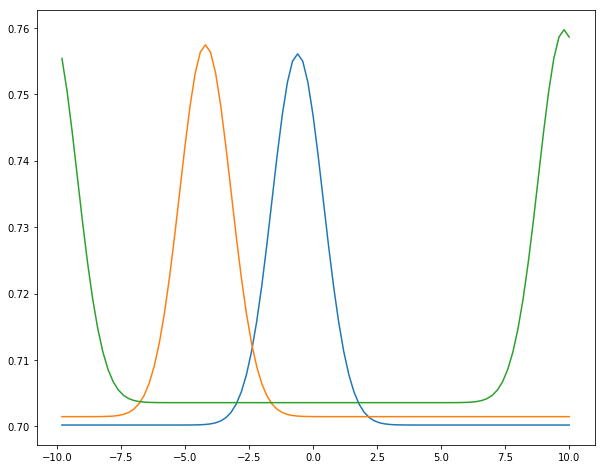

In [57]:
main,mvar,xstore = lb(.0001)
main =np.array(main)
nmain = np.sum(main,1)
plt.figure(figsize=(10,8))
plt.plot(xstore,nmain[2,1:-1])
plt.plot(xstore,nmain[20,1:-1])
plt.plot(xstore,nmain[50,1:-1])
plt.plot(xstore,nmain[150,1:-1])
plt.plot(xstore,nmain[250,1:-1])
plt.plot(xstore,nmain[450,1:-1])
plt.plot(xstore,nmain[550,1:-1])
plt.plot(xstore,nmain[650,1:-1])
plt.plot(xstore,nmain[700,1:-1])
plt.xlabel('position')
plt.ylabel('mass density')
plt.title('omega = 0.0001,visc = 1')


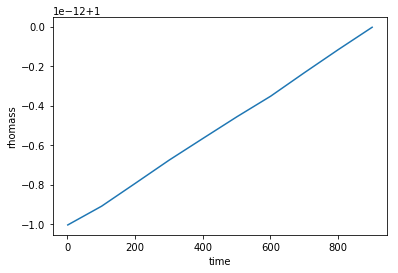

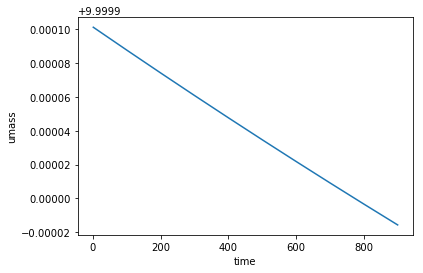

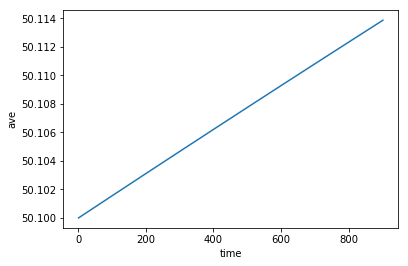

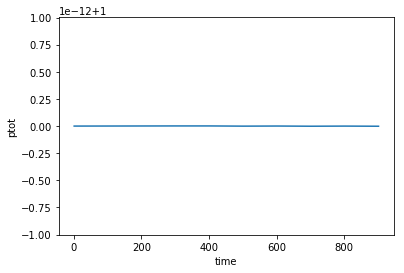

In [8]:
mvar = np.array(mvar)
plt.figure()
plt.plot(mvar[:,0],mvar[:,1],label = 'rhomass')
plt.xlabel('time')
plt.ylabel('rhomass')
plt.figure()
plt.plot(mvar[:,0],mvar[:,2],label = 'umass')
plt.xlabel('time')
plt.ylabel('umass')
plt.figure()
plt.plot(mvar[:,0],mvar[:,3],label = 'ave')
plt.xlabel('time')
plt.ylabel('ave')
plt.figure()
plt.plot(mvar[:,0],mvar[:,4],label = 'ptot')
plt.xlabel('time')
plt.ylabel('ptot')

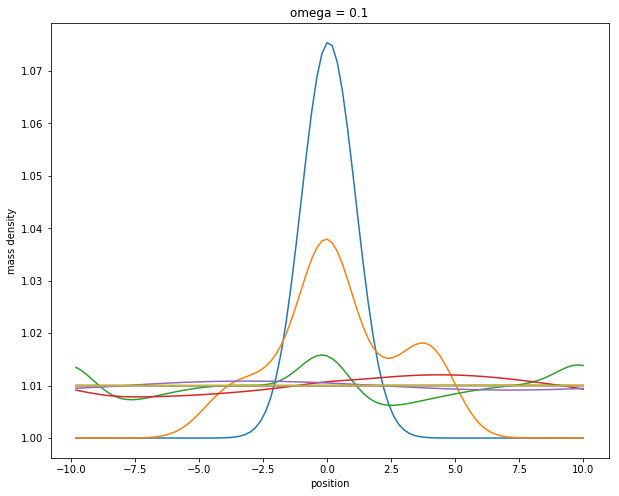

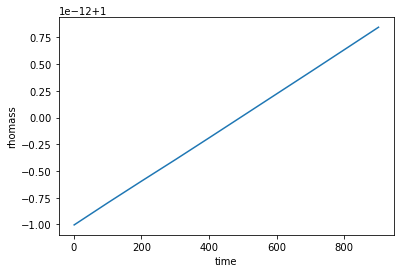

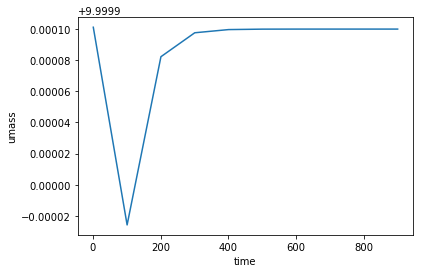

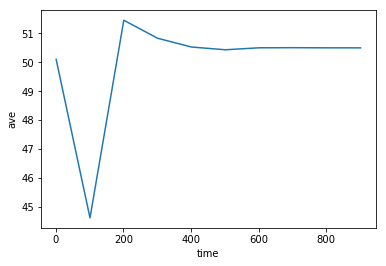

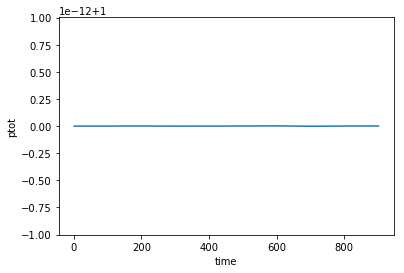

In [13]:
main,mvar,xstore = lb(0.1)
main =np.array(main)
nmain = np.sum(main,1)
plt.figure(figsize = (10,8))
plt.plot(xstore,nmain[2,1:-1])
plt.plot(xstore,nmain[20,1:-1])
plt.plot(xstore,nmain[50,1:-1])
plt.plot(xstore,nmain[150,1:-1])
plt.plot(xstore,nmain[250,1:-1])
plt.plot(xstore,nmain[450,1:-1])
plt.plot(xstore,nmain[550,1:-1])
plt.plot(xstore,nmain[650,1:-1])
plt.plot(xstore,nmain[700,1:-1])
plt.xlabel('position')
plt.ylabel('mass density')
plt.title('omega = 0.1')
mvar = np.array(mvar)
plt.figure()
plt.plot(mvar[:,0],mvar[:,1],label = 'rhomass')
plt.xlabel('time')
plt.ylabel('rhomass')
plt.figure()
plt.plot(mvar[:,0],mvar[:,2],label = 'umass')
plt.xlabel('time')
plt.ylabel('umass')
plt.figure()
plt.plot(mvar[:,0],mvar[:,3],label = 'ave')
plt.xlabel('time')
plt.ylabel('ave')
plt.figure()
plt.plot(mvar[:,0],mvar[:,4],label = 'ptot')
plt.xlabel('time')
plt.ylabel('ptot')

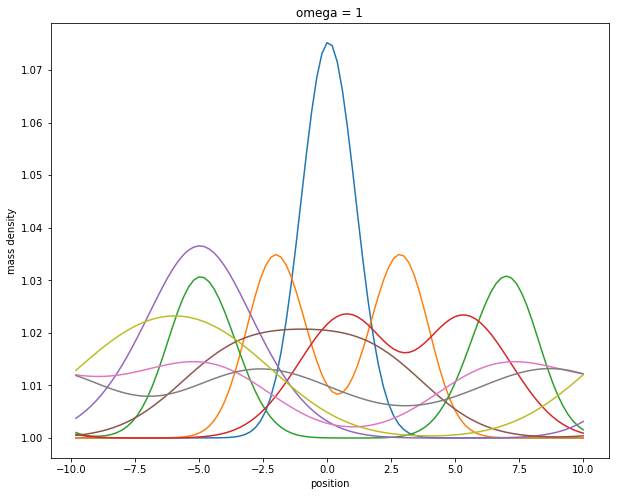

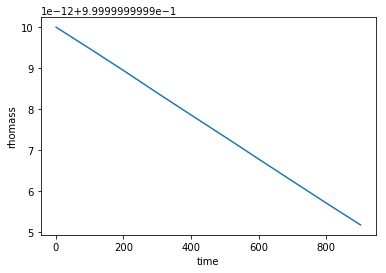

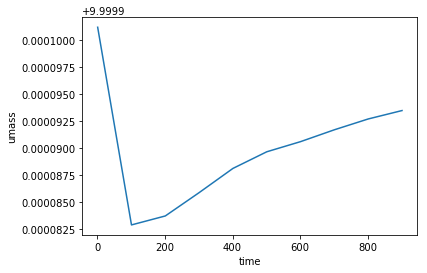

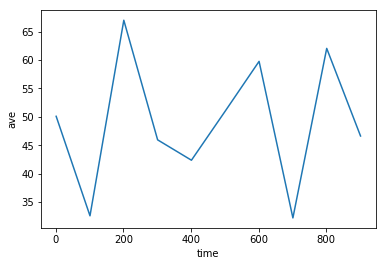

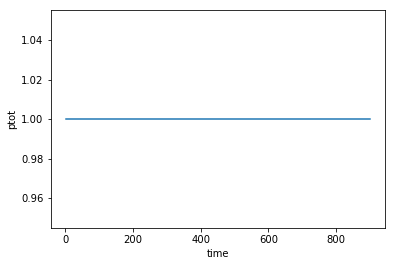

In [12]:
main,mvar,xstore = lb(1)
main =np.array(main)
nmain = np.sum(main,1)
plt.figure(figsize = (10,8))
plt.plot(xstore,nmain[2,1:-1])
plt.plot(xstore,nmain[20,1:-1])
plt.plot(xstore,nmain[50,1:-1])
plt.plot(xstore,nmain[150,1:-1])
plt.plot(xstore,nmain[250,1:-1])
plt.plot(xstore,nmain[450,1:-1])
plt.plot(xstore,nmain[550,1:-1])
plt.plot(xstore,nmain[650,1:-1])
plt.plot(xstore,nmain[700,1:-1])
plt.xlabel('position')
plt.ylabel('mass density')
plt.title('omega = 1')
mvar = np.array(mvar)
plt.figure()
plt.plot(mvar[:,0],mvar[:,1],label = 'rhomass')
plt.xlabel('time')
plt.ylabel('rhomass')
plt.figure()
plt.plot(mvar[:,0],mvar[:,2],label = 'umass')
plt.xlabel('time')
plt.ylabel('umass')
plt.figure()
plt.plot(mvar[:,0],mvar[:,3],label = 'ave')
plt.xlabel('time')
plt.ylabel('ave')
plt.figure()
plt.plot(mvar[:,0],mvar[:,4],label = 'ptot')
plt.xlabel('time')
plt.ylabel('ptot')

***

In [44]:

def lb(omega):
    # variable definition
    visco = 0.1
    ar = 0
    br =0
    sigma = 5.
    rho0 = 1.00
    nout = 100
    mvar = []
    rhoinl = 1.01
    rhoout =0.99
    u0 = 0.1
    efield = 0.0
    nsteps = 1001
    ndiag = 10
    lw = 3

    main = []
    # function defs
    w = np.zeros(3)
    nx = 100
    f = np.zeros((3,nx+2))
    feq = np.zeros((3,nx+2))
    rho = np.zeros(nx+2)
    u = np.zeros(nx+2)

    uinit = np.zeros(nx+2)
    flag = np.zeros(nx)

    #         c lattice weights
    if(lw==1):
    # c relativistic radiation (standard)

        w[0] = 2./3.
        w[1] = 1./6.
        w[2] = w[1]

    if(lw==2):
    # c quark gluon (standard)

        w[0] = 0.5
        w[1] = 0.5
        w[2] = 0.

    if(lw==3):
    # c bose condensation (standard)

        w[0] = 0.
        w[1] = 0.
        w[2] = 1.


    cs2 = w[1]+w[2] 
    #omega = 1./(0.5+visco/cs2)        
#     omega = 0.0001
    omega = omega
    rho1  = 2*rho0

    # c ===============================
    # subroutine init(iseed)
    # c initial conditions for the populations
    # c ===============================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c--------------------------------------------------
    xstore = []
    amp= 1./np.sqrt(2.*np.pi)/sigma
    for i in range(1,nx+1):
        x = float(i-nx/2)/sigma
        xstore.append(x)
        form   = np.exp(-0.5*x*x)
        rho[i] = rho0+amp*form
        u[i]   = u0
        uinit[i]=u[i]
    #     c we use the local equilibrium with the input density and flow fields
        f[0,i]=rho[i]*w[0]
        f[1,i]=rho[i]*w[1]*(1+3.0*u[i])
        f[2,i]=rho[i]*w[2]*(1-3.0*u[i])



    # Time Step all of this

    for istep in range(1,nsteps):
    # c ==================================
    # subroutine pbc
    # c ==================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c --------------------------------------
    # c periodic BC
        f[1,0]    = f[1,nx]
        f[2,nx+1] = f[2,1]

    # c ==================================
    # subroutine move
    # c ==================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c---------------------------------------------
        for  i in range(nx,0,-1): 
            f[1,i] = f[1,i-1]
        for i in range(1,nx+1):
            f[2,i] = f[2,i+1]

    # c =====================================
    # subroutine hydrovar
    # c =====================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c form the macroscopic fields (hydro-variables)
    # c----------------------------------------
        for i in range(1,nx+1):
            rho[i]=f[0,i]+f[1,i]+f[2,i] 
            u[i]=(f[1,i]-f[2,i])/rho[i] 

    # c ========================================
    # subroutine equili
    # c ========================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c form local equilibria
    # c-------------------------------------------------
        q0   = -cs2
        q1   = 1.0-cs2
        q2   = q1
        for i in range(1,nx+1):
            ul  = u[i]/cs2
            uq  = 0.5*ul*ul
            feq[0,i] = w[0]*rho[i]*(1.0      + q0*uq)
            feq[1,i] = w[1]*rho[i]*(1.0 + ul + q1*uq)
            feq[2,i] = w[2]*rho[i]*(1.0 - ul + q2*uq)

    # c =======================================================
    # subroutine colli
    # c =======================================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c----------------------------------------------------------

        for i in range(1,nx+1):
            for k in range(3):
                f[k,i] = (1.0-omega)*f[k,i]+omega*feq[k,i]


    # c =======================================================
    # subroutine force
    # c =======================================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # dimension amul(nx)
    # c----------------------------------------------------------

        frce = efield
        # c external force and chemical source
        for i in range(1,nx+1):
            srce   = (ar-br*rho[i])*rho[i]
            f[0,i] = f[0,i]+w[0]*srce
            f[1,i] = f[1,i]+w[1]*(srce+frce)
            f[2,i] = f[2,i]+w[2]*(srce-frce)

        main.append(np.copy(u))
    # c ===================================
    # subroutine diagno(istep)
    # c ===================================
    # implicit double precision(a-h,o-z)
    # include 'd1q3.par'
    # c diagnostic output
    # c----------------------------------------------------------
    #t = float(istep)
        if (np.mod(istep,nout)==1):
            t = float(istep)
            rhomass=0.
            umass  = 0.
            for i in range(1,nx+1):
                rhomass=rhomass+(rho[i]-rho0)   
                umass  = umass+u[i]
            # c moments
            ave  = 0.
            ptot = 0.
            for i in range(1,nx+1):
                x = float(i)
                pi = (rho[i]-rho0)/rhomass
                ptot=ptot+pi
                ave = ave + pi*x

            var=0.
            for i in range(1,nx+1):
                x = float(i)-ave
                pi = (rho[i]-rho0)/rhomass
                var = var + pi*x*x

            # c analytical
            varan = sigma*sigma+visco*t
            mvar.append((t,rhomass,umass,ave,ptot))
    return main

In [45]:
main = lb(1)
main = np.array(main)
np.shape(main)

(1000, 102)

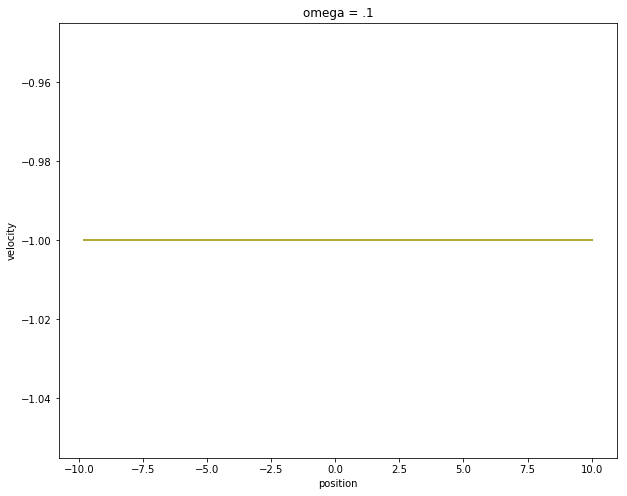

In [47]:
main = lb(.00001)
main =np.array(main)

plt.figure(figsize = (10,8))
plt.plot(xstore,main[0,1:-1])
plt.plot(xstore,main[20,1:-1])
plt.plot(xstore,main[50,1:-1])
plt.plot(xstore,main[150,1:-1])
plt.plot(xstore,main[250,1:-1])
plt.plot(xstore,main[450,1:-1])
plt.plot(xstore,main[550,1:-1])
plt.plot(xstore,main[650,1:-1])
plt.plot(xstore,main[700,1:-1])
plt.xlabel('position')
plt.ylabel('velocity')
plt.title('omega = .1')

# LB 2dq9
### Slow

In [36]:
# %===========================================================
# %             Basic LB Code for Poiseuille Flow
# %===========================================================
# %        developed by Prof. Giacomo Falcucci, PhD
# %          for AC274 Class @ HARVARD UNIVERSITY
# %                          2017
# %___________________________________________________________
# %
# %vars

import time
lx=100;
ly=40;
w=[4/9,1/9,1/9,1/9,1/9,1/36,1/36,1/36,1/36];
ex=[0,1,0,-1,0,1,-1,-1,1];
ey=[0,0,1,0,-1,1,1,-1,-1];
tau=1;
g=10**(-4);
cs=1/np.sqrt(3);
tstep=1000;
tplot=100;
main=[]
# arrays
rho=np.ones((lx,ly));
u=np.zeros((lx,ly));
v=np.zeros((lx,ly));
f_in=np.zeros((9,lx,ly));
opp=[0,3,4,1,2,7,8,5,6];


# %% initialization

for kk in range(9):
    f_in[kk,:,:]=w[kk]*rho; 


f_out=np.copy(f_in);

# % main loop



for tt in range(1,tstep):
    
#     %% macroscopic
    t1 = time.clock()
    for ii in range(lx):
        for jj in range(ly):
            rho[ii,jj]=0;
            u[ii,jj]=0;
            v[ii,jj]=0;

            for kk in range(9):
                rho[ii,jj]=rho[ii,jj]+f_in[kk,ii,jj];
                u[ii,jj]=u[ii,jj]+f_in[kk,ii,jj]*ex[kk];
                v[ii,jj]=v[ii,jj]+f_in[kk,ii,jj]*ey[kk];
        
            u[ii,jj]=u[ii,jj]/rho[ii,jj];
            v[ii,jj]=v[ii,jj]/rho[ii,jj];

# %% collision
    for ii in range(lx):
        for jj in range(ly):
            u[ii,jj]=u[ii,jj] + g*tau/rho[ii,jj];
            for kk in range(9):
                cu=(1/cs**2)*(ex[kk]*u[ii,jj] + ey[kk]*v[ii,jj]);
                feq=rho[ii,jj]*w[kk]*(1 + cu + cu**2 - (u[ii,jj]**2 + v[ii,jj]**2)/(2*cs**2));
                f_in[kk,ii,jj]=f_in[kk,ii,jj] + (1/tau)*(feq - f_in[kk,ii,jj]);

        
   
    fout=f_in; 
# %%bbboundary
    
# %north & south
    for ii in range(lx):
        for kk in range(9):
            fout[kk,ii,ly-1]=f_in[opp[kk],ii,ly-1];
            fout[kk,ii,0]=f_in[opp[kk],ii,0];
    
    for kk in range(9):
        f_in[kk,:,:]=np.roll(fout[kk,:,:],ex[kk],axis=0);
        f_in[kk,:,:]=np.roll(fout[kk,:,:],ey[kk],axis=1);
    if (np.mod(tt,100) == 1):
        main.append(np.copy(f_in))
    print(time.clock()-t1)

0.21863152059859203
0.22022006138377037
0.23090789072830376
0.22739511752024555
0.22989235300110522
0.22332802996970713
0.2352680032272474
0.23577330376974714
0.2313292683616055
0.23401726978318038
0.22774914525598433
0.22724454994749976
0.2234151264342472
0.23750677025145706
0.22700759114468383
0.24702426288922652
0.23276583110464344
0.2387867709285274
0.2333800903829797


KeyboardInterrupt: 